In [1]:
# Import various libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data

The following data with 10,000 bank customer was obtained from Kaggle, and it can be obtained from the following <a href='https://www.kaggle.com/santoshd3/bank-customers'> LINK </a>.

# EDA / Data Cleaning

In [2]:
# import dataset
df = pd.read_csv('dataset/Churn_Modeling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Check for any null values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

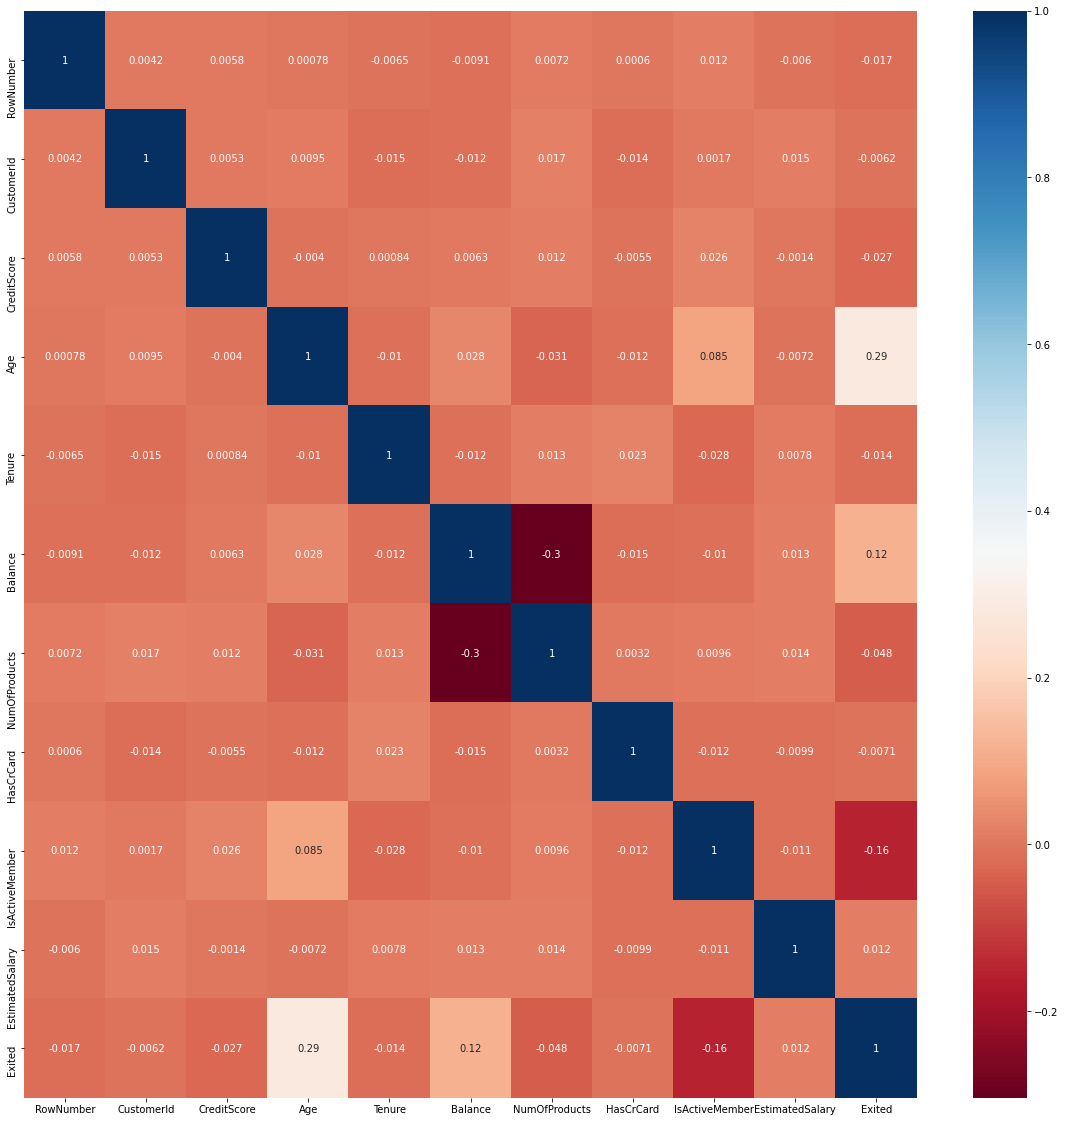

In [5]:
# correlation map
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")

> From the above correlation figure, it seems like `age`, `balance` and `estimated salary` are correlated with customers' churn rate.

In [27]:
# Set X and y
X = df.iloc[:,3:-1]
y = df.iloc[:,-1]

In [29]:
# Checking the types of data in df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


> We can see that `Geography` and `Gender` are categorical data.

In [31]:
# Get dummy variables
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [32]:
# Drop categorical features from X.
X.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [34]:
X.head() # Check to see whether the two features are removed

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [37]:
# Concatenate the three dataframes into one
X = pd.concat([X, geography, gender], axis=1) 

In [38]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


> Now you can see that dummy features have been added on the right columns.

# Predictive Models

In [43]:
# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

In [51]:
# Check if data has been divided 'evenly'
print(y_train.value_counts(1))
print(y_test.value_counts(1))

0    0.79625
1    0.20375
Name: Exited, dtype: float64
0    0.7965
1    0.2035
Name: Exited, dtype: float64


In [70]:
# Import XGBoost
from xgboost import XGBClassifier

# Instantiate and fit/transform XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [96]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix
def evaluate_model(estimator, X_test, y_test):
    """
    Evaluates a model using accuarcy, roc_auc_score, confusion matrix, classification report.
    """
    # Predicted test y_values
    y_pred = estimator.predict(X_test)

    # Calculuates accuarcy of the model
    accuracy = accuracy_score(y_test, y_pred)
    # Calculuates ROC of the moodel
    roc = roc_auc_score(y_test, y_pred)

    # Create classification report
    print('#'*53)
    print('#'*15,'Classification Report','#'*15,)
    print('#'*53)
    print(classification_report(y_test, y_pred,))
    # Prints out the accuracy and roc
    print(f"Accuracy: {round(accuracy*100,2)}%")
    print(f"ROC: {round(roc,2)}")
    print('#'*53)
    # Create confusion matrix plot
    plot_confusion_matrix(xgb, X_test, y_test, cmap='Blues', normalize='true')

#####################################################
############### Classification Report ###############
#####################################################
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.80      0.46      0.59       407

    accuracy                           0.87      2000
   macro avg       0.84      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy: 86.7%
ROC: 0.72
#####################################################


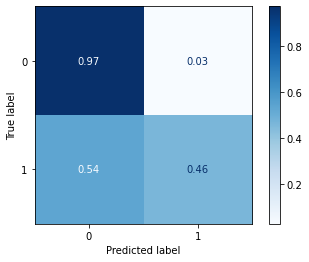

In [97]:
# Evaluates the initial model
evaluate_model(xgb, X_test, y_test)

# Hyperparameter Tuning Using RandomGridSearch

In [69]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [68]:
# Source: https://www.youtube.com/watch?v=9HomdnM12o4
# Hyperparameter optimization
params = {
    'learning_rate'    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth'        : [3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight' : [1, 3, 5, 7],
    'gamma'            : [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree' : [0.3, 0.4, 0.5, 0.7]
}

In [71]:
rs = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [73]:
# Code by Krish Naik LINK: https://www.youtube.com/watch?v=9HomdnM12o4
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [74]:
from datetime import datetime

start_time = timer(None)
rs.fit(X_train, y_train)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    9.0s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.3s finished



 Time taken: 0 hours 0 minutes and 10.23 seconds.


In [75]:
rs.best_params_

{'min_child_weight': 3,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [98]:
best_xgb = rs.best_estimator_

#####################################################
############### Classification Report ###############
#####################################################
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.83      0.43      0.57       407

    accuracy                           0.87      2000
   macro avg       0.85      0.70      0.74      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy: 86.65%
ROC: 0.7
#####################################################


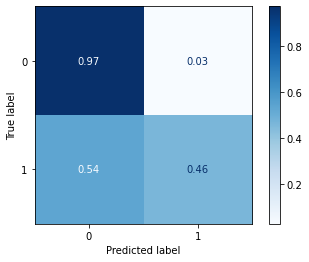

In [99]:
# Evaluate the best model
evaluate_model(best_xgb, X_test, y_test)

## Cross validation

In [103]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rs.best_estimator_, X, y, cv=10)

In [105]:
np.mean(score)

0.8645999999999999

# Neural Network


In [8]:
new_df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = new_df.drop('Exited', axis=1)
y = new_df['Exited']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [43]:
# Applies min-max scales
X_train.loc[:, ['CreditScore', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(X_train[['CreditScore', 'Balance', 'EstimatedSalary']])
X_test.loc[:, ['CreditScore', 'Balance', 'EstimatedSalary']] = scaler.transform(X_test[['CreditScore', 'Balance', 'EstimatedSalary']])

# gets deummy variables for 'geo' and 'gender' info
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
# Creates layers of neurons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
X_train.values.shape

(7000, 11)

## Model #1

In [75]:
model = Sequential()

model.add(Dense(11, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(11, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [76]:
model.fit(X_train.values, y_train.values, epochs=100, validation_data=(X_test.values, y_test.values))

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.5546 - val_loss: 0.5129
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4972 - val_loss: 0.4783
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4798 - val_loss: 0.4682
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4511 - val_loss: 0.4507
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4331 - val_loss: 0.4508
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4404 - val_loss: 0.4460
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4310 - val_loss: 0.4446
Epoch 8/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4358 - val_loss: 0.4428
Epoch 9/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4420 - val_loss: 0.4412
Epoch 10/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4233 - val_lo

219/219 [==============================] - 0s 1ms/step - loss: 0.3505 - val_loss: 0.3613
Epoch 82/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3475 - val_loss: 0.3634
Epoch 83/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3394 - val_loss: 0.3617
Epoch 84/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3653 - val_loss: 0.3660
Epoch 85/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3537 - val_loss: 0.3662
Epoch 86/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3283 - val_loss: 0.3637
Epoch 87/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3435 - val_loss: 0.3586
Epoch 88/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3507 - val_loss: 0.3629
Epoch 89/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3474 - val_loss: 0.3574
Epoch 90/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3474 - val_loss: 

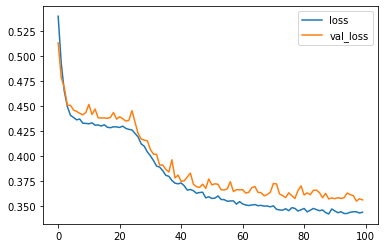

In [77]:
pd.DataFrame(model.history.history).plot()

In [78]:
y_pred = model.predict_classes(X_test.values)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [79]:
print(classification_report(y_test.values, y_pred))
confusion_matrix(y_test.values, y_pred)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1       0.79      0.42      0.55       611

    accuracy                           0.86      3000
   macro avg       0.83      0.69      0.73      3000
weighted avg       0.85      0.86      0.84      3000



array([[2322,   67],
       [ 356,  255]])

## Model #2

In [85]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25)

In [88]:
model = Sequential()

model.add(Dense(11, activation='relu'))

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [89]:
model.fit(X_train.values, y_train.values, epochs=600, validation_data=(X_test.values, y_test.values), 
          callbacks=[early_stop])

Epoch 1/600
219/219 [==============================] - 1s 2ms/step - loss: 0.7344 - val_loss: 0.5183
Epoch 2/600
219/219 [==============================] - 0s 1ms/step - loss: 0.5309 - val_loss: 0.4897
Epoch 3/600
219/219 [==============================] - 0s 1ms/step - loss: 0.5072 - val_loss: 0.4734
Epoch 4/600
219/219 [==============================] - 0s 1ms/step - loss: 0.4857 - val_loss: 0.4606
Epoch 5/600
219/219 [==============================] - 0s 1ms/step - loss: 0.4770 - val_loss: 0.4572
Epoch 6/600
219/219 [==============================] - 0s 1ms/step - loss: 0.4732 - val_loss: 0.4515
Epoch 7/600
219/219 [==============================] - 0s 1ms/step - loss: 0.4645 - val_loss: 0.4476
Epoch 8/600
219/219 [==============================] - 0s 1ms/step - loss: 0.4618 - val_loss: 0.4447
Epoch 9/600
219/219 [==============================] - 0s 1ms/step - loss: 0.4581 - val_loss: 0.4479
Epoch 10/600
219/219 [==============================] - 0s 1ms/step - loss: 0.4485 - val_lo

219/219 [==============================] - 0s 1ms/step - loss: 0.3604 - val_loss: 0.3616
Epoch 82/600
219/219 [==============================] - 0s 1ms/step - loss: 0.3587 - val_loss: 0.3624
Epoch 83/600
219/219 [==============================] - 0s 1ms/step - loss: 0.3665 - val_loss: 0.3685
Epoch 84/600
219/219 [==============================] - 0s 2ms/step - loss: 0.3813 - val_loss: 0.3620
Epoch 85/600
219/219 [==============================] - 0s 2ms/step - loss: 0.3644 - val_loss: 0.3625
Epoch 86/600
219/219 [==============================] - 0s 1ms/step - loss: 0.3695 - val_loss: 0.3602
Epoch 87/600
219/219 [==============================] - 0s 1ms/step - loss: 0.3621 - val_loss: 0.3607
Epoch 88/600
219/219 [==============================] - 0s 1ms/step - loss: 0.3697 - val_loss: 0.3630
Epoch 89/600
219/219 [==============================] - 0s 1ms/step - loss: 0.3657 - val_loss: 0.3618
Epoch 90/600
219/219 [==============================] - 0s 1ms/step - loss: 0.3732 - val_loss: 

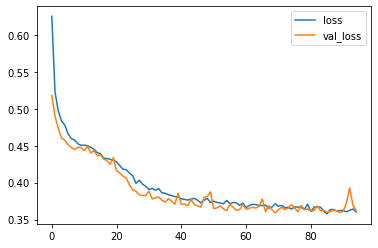

In [90]:
pd.DataFrame(model.history.history).plot()

In [68]:
y_pred = model.predict_classes(X_test)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [91]:
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
print(classification_report(y_test.values, y_pred))
confusion_matrix(y_test.values, y_pred)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1       0.79      0.42      0.55       611

    accuracy                           0.86      3000
   macro avg       0.83      0.69      0.73      3000
weighted avg       0.85      0.86      0.84      3000



array([[2322,   67],
       [ 356,  255]])

# Conclusion

In this notebook, we have implemented XGBoostClassifier to predict which customer will likely to leave. Using RandomizedSearchCV, we tuned hyperparameter of our model achieving 86.5% accuracy (cv=10). 

# Further Studies

Overall goal should be correctly identifying customers who will leave the bank so that the bank could offer them something to keep them. So feature engineering or scaling could be explored to increase its negative recall (currently 46%).